#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [ ]:
from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline

In [3]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model, compile_model, compile_model2, train_model
from model_evaluation import evaluate_model, return_confusion_matrix

from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten, Dropout, MaxPooling2D
from tensorflow import keras


In [4]:
def main ():
    from tensorflow.keras.datasets import cifar10
    raw_data = get_data (cifar10)

    Xy_data = get_train_test_data (raw_data)

    Xy_data_normalised = normalise_data (Xy_data)

    return Xy_data_normalised

In [4]:
def main2 ():
    '''Function for running the model from importing the data to training and 
    evalution.'''
    from tensorflow.keras.datasets import cifar10
    data_model = create_pipeline ([
                                   get_data, 
                                   get_train_test_data, 
                                   normalise_data, 
                                   create_model (
                                       input_layer = Input (shape = (32, 32, 3)), 
                                       hidden_layers = [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                        Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                        MaxPooling2D (pool_size = (2, 2)),
                                                        Dropout (0.25),
                                                        Flatten (),
                                                        Dense (64, activation = "relu"),
                                                        Dropout (0.5), 
                                                        Dense (10, activation = "softmax")
                                                        ]
                                                 ),
                                   compile_model2 (optimizer = "Adam",
                                                  loss = "sparse_categorical_crossentropy",
                                                  metrics = ["sparse_categorical_accuracy"]),
                                   train_model (batch_size = 32, epochs = 5, validation_split = 0.2),
                                   evaluate_model (),
                                   return_confusion_matrix ()
                                   ])   #   This is a function
                                   #   Not sure if this is the best way to do 
                                   #   this. Maybe it would be better to create 
                                   #   the model and then add the returned 
                                   #   function to the pipeline.

                        #   The 'Flatten' layer is need. It reshapes the data so
                        #   the following layers output shape is one dimension. 
                        #   This is needed so the model will output the label
                        #   for each photo in the dataset. The output shape for
                        #   the end of the model is (None, 10), 10 being the 10
                        #   labels in the dataset. Without the 'Flatten' layer
                        #   the output shape of the model is (None, 32, 32, 10).
                        #   This results in a error due to the output having a 
                        #   different shape to the labels in 'y.' So, the 
                        #   'Flatten' causes the model to output a digit, which
                        #   corresponds to the label.

    data_n_model = data_model (cifar10)   #   initializing function


    return data_n_model

#### Run through

170508288/170498071 [==============================] - 3s 0us/step
Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 143s 114ms/step - loss: 1.7072 - sparse_categorical_accuracy: 0.3674 - val_loss: 1.3747 - val_sparse_categorical_accuracy: 0.5203
Epoch 2/5
1250/1250 [==============================] - 142s 113ms/step - loss: 1.4425 - sparse_categorical_accuracy: 0.4750 - val_loss: 1.2158 - val_sparse_categorical_accuracy: 0.5737
Epoch 3/5
1250/1250 [==============================] - 142s 114ms/step - loss: 1.3208 - sparse_categorical_accuracy: 0.5180 - val_loss: 1.1181 - val_sparse_categorical_accuracy: 0.6108
Epoch 4/5
1250/1250 [==============================] - 142s 114ms/step - loss: 1.2538 - sparse_categorical_accuracy: 0.5456 - val_loss: 1.1093 - val_sparse_categorical_accuracy: 0.6134
Epoch 5/5
1250/1250 [==============================] - 142s 114ms/step - loss: 1.1924 - sparse_categorical_accuracy: 0.5678 - val_loss: 1

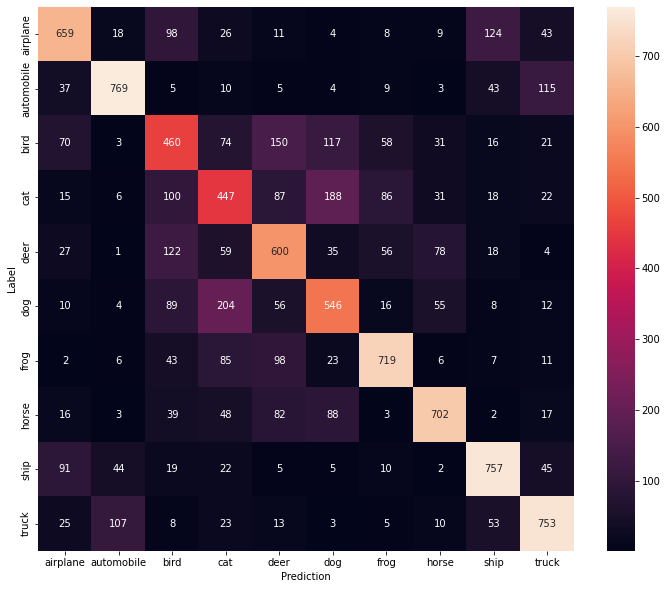

In [5]:
test_data = main2 ()

In [7]:
test_data._fields

('data_raw', 'data_normalised', 'model', 'history')

In [8]:
test_data.history.params

{'epochs': 5, 'steps': 1250, 'verbose': 1}

In [9]:
test_data.history.history.keys ()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [10]:
test_data.history.history['loss']

[2.1839919090270996,
 1.9939335584640503,
 1.9540222883224487,
 1.9135029315948486,
 1.9040172100067139]

In [ ]:
display (test_data._fields,
         test_data.data_raw._fields,
         test_data.data_normalised._fields)

('data_raw', 'data_normalised', 'model')

('X_train', 'y_train', 'X_test', 'y_test')

('X_train_norm', 'y_train', 'X_test_norm', 'y_test')

#### After compile

In [ ]:
test_data_model = main2 ()

Model compiled for compile_model2


In [ ]:
test_data_model.model.compiled_loss._losses

'sparse_categorical_crossentropy'

In [ ]:
test_data_model.model.compiled_metrics._metrics

['accuracy', 'sparse_categorical_accuracy']

In [ ]:
test_data_model.model.optimizer

In [ ]:
def model_compile_info (data_model):
    '''Get information on the compiled model.'''

    print (data_model.model.compiled_loss._losses, "\n",
           data_model.model.compiled_metrics._metrics, "\n",
           data_model.model.optimizer)

#### Training

Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 279s 223ms/step - loss: 1.4078 - sparse_categorical_accuracy: 0.4937 - val_loss: 1.0884 - val_sparse_categorical_accuracy: 0.6178
Epoch 2/5
1250/1250 [==============================] - 284s 227ms/step - loss: 1.0241 - sparse_categorical_accuracy: 0.6395 - val_loss: 0.9846 - val_sparse_categorical_accuracy: 0.6518
Epoch 3/5
1250/1250 [==============================] - 307s 245ms/step - loss: 0.8510 - sparse_categorical_accuracy: 0.7035 - val_loss: 0.9209 - val_sparse_categorical_accuracy: 0.6836
Epoch 4/5
1250/1250 [==============================] - 282s 226ms/step - loss: 0.7009 - sparse_categorical_accuracy: 0.7518 - val_loss: 0.8500 - val_sparse_categorical_accuracy: 0.7123
Epoch 5/5
1250/1250 [==============================] - 283s 226ms/step - loss: 0.5523 - sparse_categorical_accuracy: 0.8067 - val_loss: 0.8842 - val_sparse_categorical_accuracy: 0.7142
Completed model tra

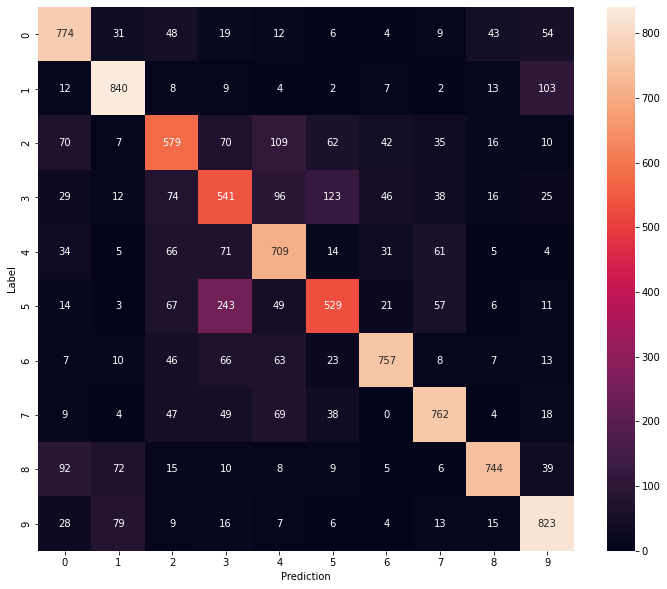

In [38]:
train_model_n_data = main2 ()

In [29]:
def return_model_summary (data_model):
    ''''''

    data_model.model.summary ()

    display (keras.utils.plot_model (data_model.model, show_shapes = True))

    #return (data_model)

Model: "cifar10_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                               

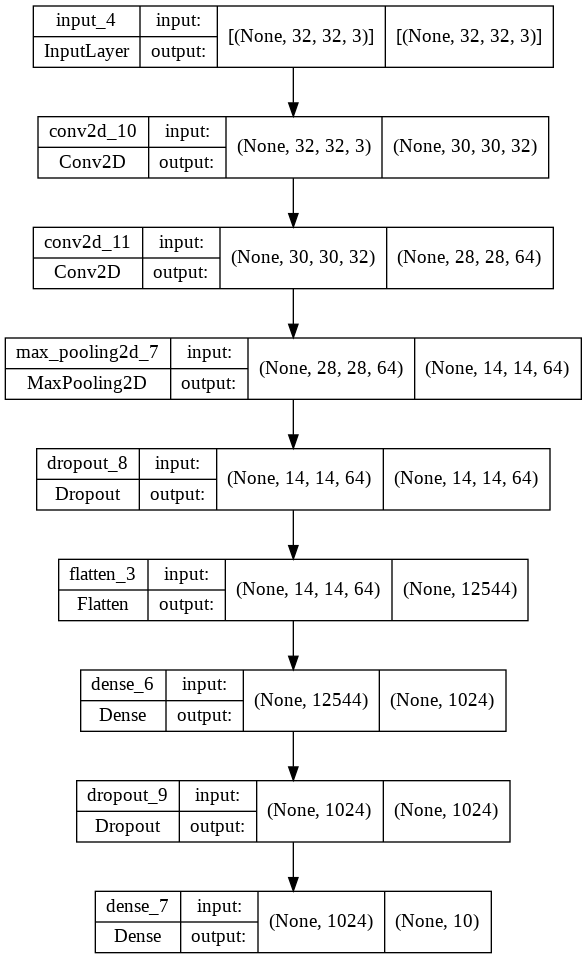

In [40]:
return_model_summary (train_model_n_data)